In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d sumn2u/garbage-classification-v2

Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2
License(s): MIT
garbage-classification-v2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip -q garbage-classification-v2.zip -d /content/dataset/


replace /content/dataset/garbage-dataset/battery/battery_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [13]:
!ls /content/dataset


garbage-dataset


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [17]:
train_path = '/content/dataset/garbage-dataset/train'
test_path  = '/content/dataset/garbage-dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/garbage-dataset/train'

In [19]:
!ls /content/dataset
!ls /content/dataset/garbage-dataset

garbage-dataset
battery     cardboard  glass  paper    shoes
biological  clothes    metal  plastic  trash


In [20]:
train_path = '/content/dataset/garbage-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    subset='validation'
)


Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.


In [21]:
# Step 12 - Build the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(train_gen.num_classes, activation='softmax')  # matches your dataset’s 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Step 13 - Train the CNN Model

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 58s 106ms/step - accuracy: 0.3607 - loss: 1.9502 - val_accuracy: 0.5485 - val_loss: 1.3168
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.5942 - loss: 1.2050 - val_accuracy: 0.6169 - val_loss: 1.1347
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.6905 - loss: 0.9146 - val_accuracy: 0.6678 - val_loss: 1.0265
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 46s 93ms/step - accuracy: 0.7798 - loss: 0.6493 - val_accuracy: 0.6746 - val_loss: 1.0384
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.8310 - loss: 0.4937 - val_accuracy: 0.6994 - val_loss: 1.0512
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.8826 - loss: 0.3630 - val_accuracy: 0.6779 - val_loss: 1.2571
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.9099 - loss: 0.2783 - val_accuracy: 0.6918 - val_loss: 1.2358
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.9235 - loss: 0.2249 -

In [23]:
# Step 14 - Save the trained model
model.save('waste_classifier_model.h5')
print("✅ Model saved successfully!")

✅ Model saved successfully!


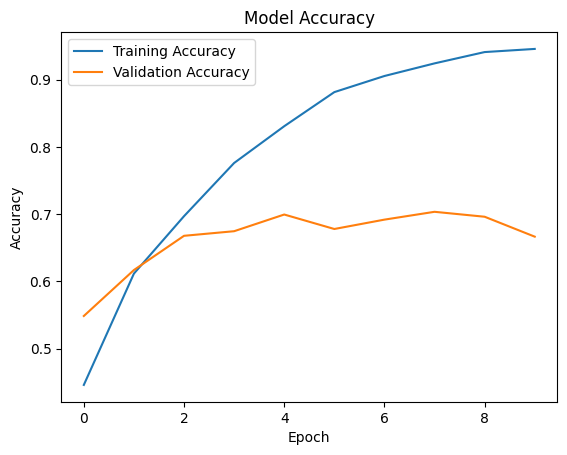

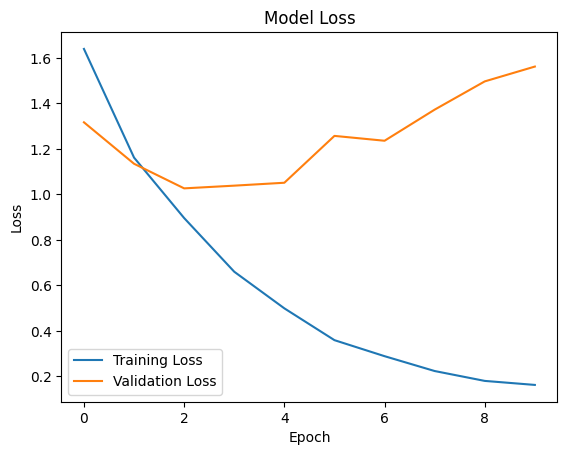

In [24]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Pick any one image from your dataset folder to test
img_path = '/content/dataset/garbage-dataset/plastic/plastic1.jpg'   # you can change this file name

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(prediction)]

# Show the image and result
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f'Predicted: {predicted_class}', fontsize=14)
plt.show()

print("✅ Predicted class:", predicted_class)
print("Image array shape:", img_array.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/garbage-dataset/plastic/plastic1.jpg'

In [26]:
!ls /content/dataset/garbage-dataset/plastic


plastic_1000.jpg  plastic_1975.jpg	       plastic_2708.jpg
plastic_1007.jpg  plastic_1976.jpg	       plastic_270.jpg
plastic_1008.jpg  plastic_1979.jpg	       plastic_2710.jpg
plastic_100.jpg   plastic_197.jpg	       plastic_2711.jpg
plastic_1012.jpg  plastic_1981.jpg	       plastic_2712.jpg
plastic_1014.jpg  plastic_1982.jpg	       plastic_2713.jpg
plastic_1016.jpg  plastic_1984.jpg	       plastic_2715.jpg
plastic_1019.jpg  plastic_1985.jpg	       plastic_2716.jpg
plastic_101.jpg   plastic_1986.jpg	       plastic_2718.jpg
plastic_1023.jpg  plastic_1989.jpg	       plastic_2719.jpg
plastic_1026.jpg  plastic_198.jpg	       plastic_271.jpg
plastic_1027.jpg  plastic_1990.jpg	       plastic_2720.jpg
plastic_1028.jpg  plastic_1991.jpg	       plastic_2721.jpg
plastic_102.jpg   plastic_1993.jpg	       plastic_2722.jpg
plastic_1034.jpg  plastic_1994.jpg	       plastic_2723.jpg
plastic_1036.jpg  plastic_1996.jpg	       plastic_2724.jpg
plastic_1038.jpg  plastic_1998.jpg	       plastic_2725.jpg
p

In [29]:
img_path = '/content/dataset/garbage-dataset/plastic/plastic_958.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


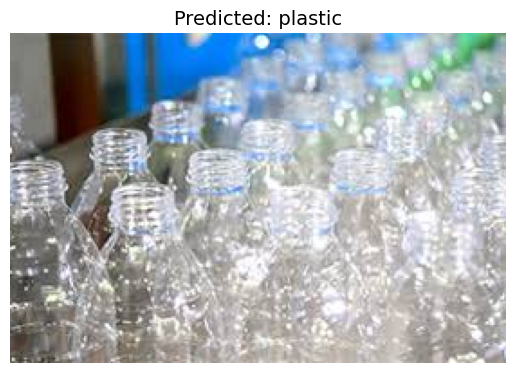

✅ Predicted class: plastic
Image array shape: (1, 128, 128, 3)


In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = '/content/dataset/garbage-dataset/plastic/plastic_958.jpg'   # your correct file

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(prediction)]

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f'Predicted: {predicted_class}', fontsize=14)
plt.show()

print("✅ Predicted class:", predicted_class)
print("Image array shape:", img_array.shape)


In [31]:
from google.colab import files
files.download('waste_classifier_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Recreate the same model structure
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')  # 10 classes in your dataset
])

# Compile it again
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
